<a href="https://colab.research.google.com/github/iamsorri/class2022Spring/blob/main/crawling(requests_BS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링

웹페이지 구성 3가지
- html
- css: 데코레이션 (style)
- java script: programming language --> 프론트
- 백엔드 프로그래밍: 언어 여러개(python, java, node 등)

<여는태그>내용</닫는태그>  
<여는태그 속성명="속성값">내용</닫는태그>  
<여는태그 속성명="속성값" />

html: 전체 html 문서를 감싸는 태그입니다. 하나만 존재해야 하고 html 바깥에 DOCTYPE을 제외한 다른 태그가 있으면 안 됩니다.  
head: html 문서에 대한 정보를 나타내는 부분입니다. 하나만 존재해야하고, html 바로 아래에 있어야합니다.  
body: html 문서에서 실제적으로 보여지는 부분을 나타냅니다. 하나만 존재해야 하고, html 바로 아래, head 다음에 위치해야 합니다.  
title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.  
meta: 문서에 대한 설명을 표시합니다. 사람에게는 보이지 않고, 브라우저만 읽을 수 있습니다. 속성으로 charset="utf-8"이라고 한 것은 브라우저에게 한글인코딩을 UTF-8로 설정하라고 알린 겁니다. 이 부분이 있어야 한글이 깨지지 않습니다.  
h1: body 안에서 제목을 표시하는 태그입니다. 중요도에 따라 h1부터 h2, h3, ..., h6까지 있습니다.  
div: 구역을 표시하는 태그입니다. 눈에 보이지는 않지만 태그(들)을 하나의 구역으로 묶었습니다.  
p: 문단을 표시하는 태그입니다. 여기 안에 글의 내용을 넣으면 됩니다.  
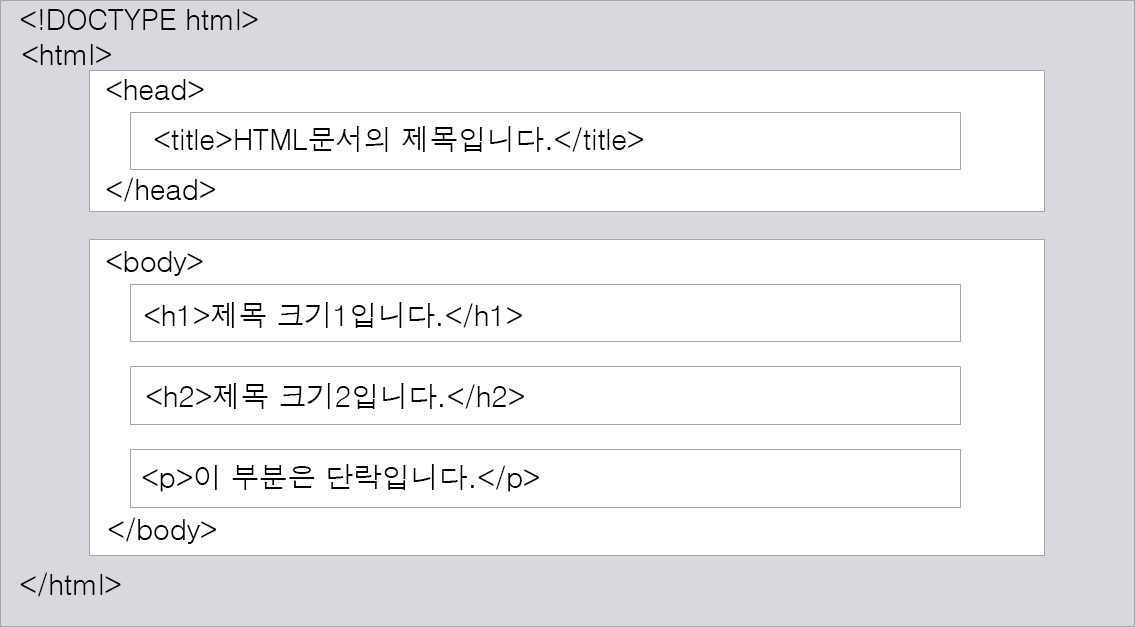

In [1]:
# _*_ coding: UTF-8 _*_
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get("http://www.wikipedia.com")
response.content

b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/4.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-de847d1a.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister

## 웹문서 전체를 가져오기

In [5]:
bsObject = BeautifulSoup(response.content, 'lxml')
  #최소한 줄바꿈은 돼서 예쁘게 정리
bsObject

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<title>Wikipedia</title>
<meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta content="initial-scale=1,user-scalable=yes" name="viewport"/>
<link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>
<link href="/static/favicon/wikipedia.ico" rel="shortcut icon"/>
<link href="//creativecommons.org/licenses/by-sa/4.0/" rel="license"/>
<style>
.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-de847d1a.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{background-

In [7]:
bsObject.html
  #한줄 자르고 html부터 시작하도록

<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<title>Wikipedia</title>
<meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta content="initial-scale=1,user-scalable=yes" name="viewport"/>
<link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>
<link href="/static/favicon/wikipedia.ico" rel="shortcut icon"/>
<link href="//creativecommons.org/licenses/by-sa/4.0/" rel="license"/>
<style>
.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-de847d1a.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{background-position:0 -47px

## head 가져오기

In [8]:
bsObject.head

<head>
<meta charset="utf-8"/>
<title>Wikipedia</title>
<meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta content="initial-scale=1,user-scalable=yes" name="viewport"/>
<link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>
<link href="/static/favicon/wikipedia.ico" rel="shortcut icon"/>
<link href="//creativecommons.org/licenses/by-sa/4.0/" rel="license"/>
<style>
.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-de847d1a.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{background-position:0 -47px;width:42px;height:42px}.svg-Me

## title 가져오기

In [10]:
bsObject.head.title
  #head 안의 title 태그만 뽑아오기

<title>Wikipedia</title>

In [11]:
bsObject.head.title.get_text()

'Wikipedia'

In [12]:
bsObject.head.title.text.strip()

'Wikipedia'

## meta 데이터 가져오기

In [13]:
bsObject.head.find_all('meta')
  #find_all 하고 meta 태그만 ㄴ가져올 수 있음

[<meta charset="utf-8"/>,
 <meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>,
 <meta content="initial-scale=1,user-scalable=yes" name="viewport"/>,
 <meta content="" property="og:url"/>,
 <meta content="Wikipedia, the free encyclopedia" property="og:title"/>,
 <meta content="website" property="og:type"/>,
 <meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." property="og:description"/>,
 <meta content="https://upload.wikimedia.org/wikipedia/en/thumb/8/80/Wikipedia-logo-v2.svg/2244px-Wikipedia-logo-v2.svg.png" property="og:image"/>]

## 모든 meta tag에 대해서, "content" property의 value 가져오기

In [16]:
for meta in bsObject.head.find_all('meta'):
    #meta 태그를 다 가져와라. 그 다음 for 루프를 돌림
    print(meta.get('content'))
      #content= 옆에 있는거 가져와라(위 참고)

None
Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.
initial-scale=1,user-scalable=yes

Wikipedia, the free encyclopedia
website
Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.
https://upload.wikimedia.org/wikipedia/en/thumb/8/80/Wikipedia-logo-v2.svg/2244px-Wikipedia-logo-v2.svg.png


## meta tag들 중 특정 property의 값이 특정 value인 tag 가져오기

In [18]:
bsObject.head.find("meta", {"name":"description"})
  #meta의 property값이 descripton인 것을 가져와라

<meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>

In [19]:
bsObject.head.find("meta", {"name":"description"}).get('content')

'Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.'

In [21]:
bsObject.head.find("meta", {"content":"website"}).get('property')
  #contnet가 website인 value값의 property를 가져와라

'og:type'

## 모든 링크의 텍스트와 주소 가져오기

In [23]:
for link in bsObject.find_all('a'):
    print(link.get_text()) #텍스트
    print(link.get('href')) #링크
    print("=========================") #분리용


English
6,974,000+ articles

//en.wikipedia.org/

日本語
1,457,000+ 記事

//ja.wikipedia.org/

Русский
2 036 000+ статей

//ru.wikipedia.org/

Deutsch
3.001.000+ Artikel

//de.wikipedia.org/

Español
2.021.000+ artículos

//es.wikipedia.org/

Français
2 674 000+ articles

//fr.wikipedia.org/

中文
1,470,000+ 条目 / 條目

//zh.wikipedia.org/

Italiano
1.910.000+ voci

//it.wikipedia.org/

Português
1.146.000+ artigos

//pt.wikipedia.org/

Polski
1 652 000+ haseł

//pl.wikipedia.org/
العربية
//ar.wikipedia.org/
Deutsch
//de.wikipedia.org/
English
//en.wikipedia.org/
Español
//es.wikipedia.org/
فارسی
//fa.wikipedia.org/
Français
//fr.wikipedia.org/
Italiano
//it.wikipedia.org/
مصرى
//arz.wikipedia.org/
Nederlands
//nl.wikipedia.org/
日本語
//ja.wikipedia.org/
Polski
//pl.wikipedia.org/
Português
//pt.wikipedia.org/
Sinugboanong Binisaya
//ceb.wikipedia.org/
Svenska
//sv.wikipedia.org/
Українська
//uk.wikipedia.org/
Tiếng Việt
//vi.wikipedia.org/
Winaray
//war.wikipedia.org/
中文
//zh.wikipedia.org/
Русс